In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [68]:
df = pd.read_csv('/content/sample_data/Chronic_Kidney_Dsease_data.csv')

In [69]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [71]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


In [72]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


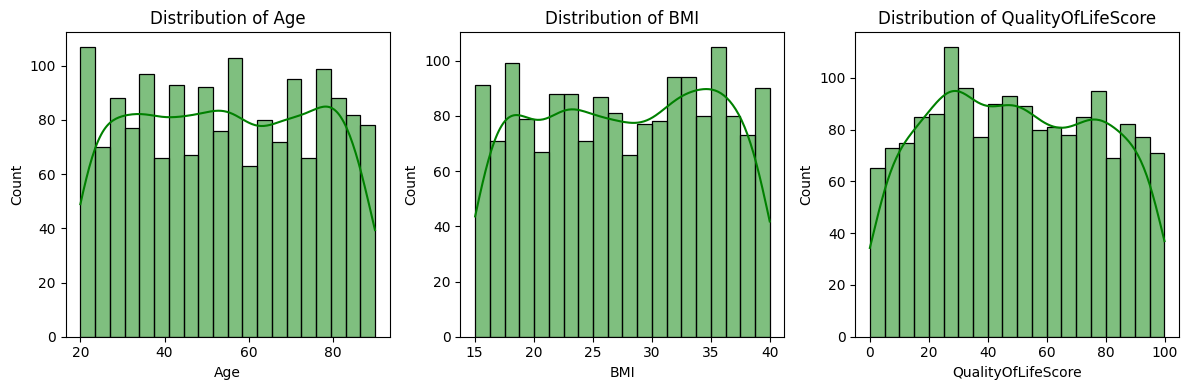

In [73]:
plt.figure(figsize=(12,4))
for i, col in enumerate(["Age", "BMI", "QualityOfLifeScore"]):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, bins=20, color='green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

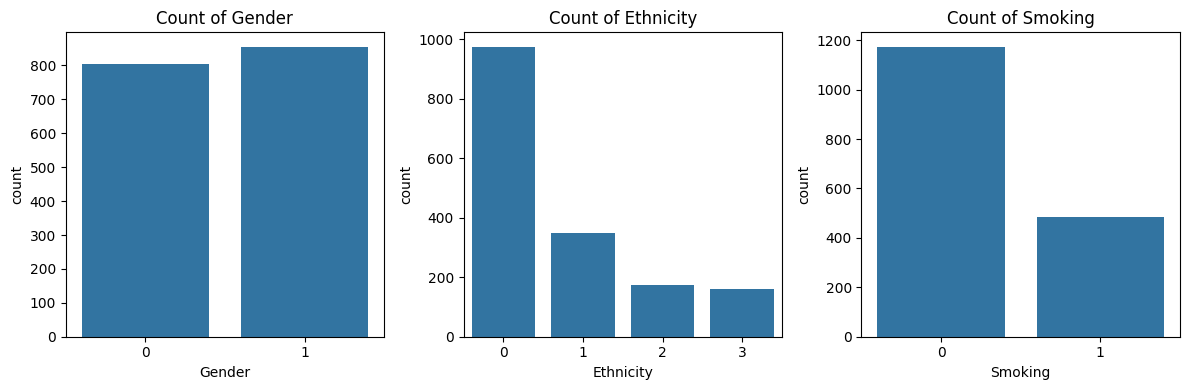

In [74]:
plt.figure(figsize=(12,4))
for i,col in enumerate(["Gender","Ethnicity","Smoking"]):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[col])
  plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

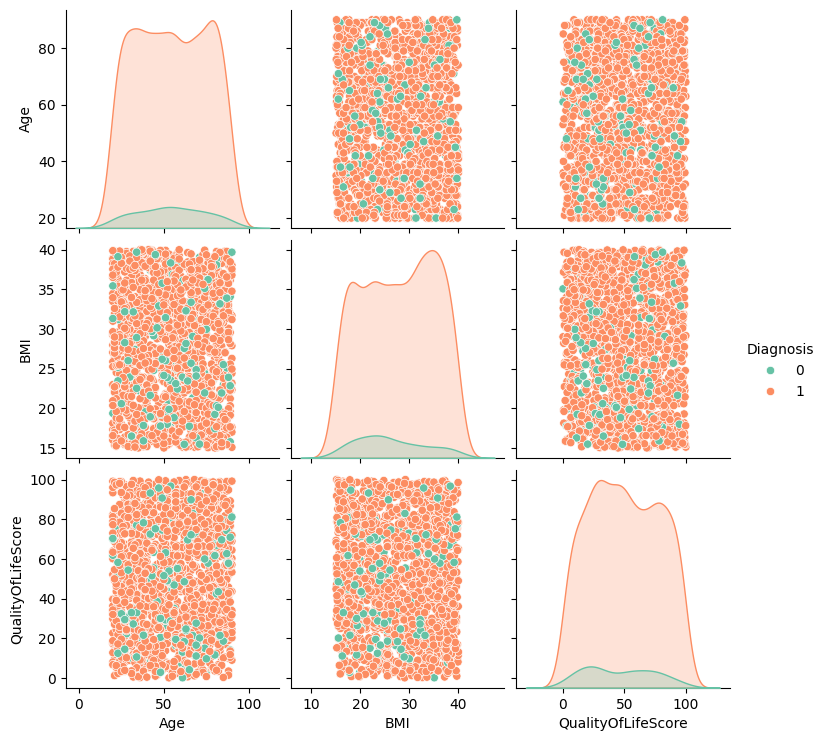

In [75]:
sns.pairplot(df[["Age","BMI","QualityOfLifeScore","Diagnosis"]], hue="Diagnosis", palette="Set2")
plt.show()

In [76]:
num_cols = ['Age','BMI','DietQuality','FamilyHistoryDiabetes','DiastolicBP','UrinaryTractInfections','GFR',
 'ProteinInUrine','SerumCreatinine']

In [77]:
num_cols

['Age',
 'BMI',
 'DietQuality',
 'FamilyHistoryDiabetes',
 'DiastolicBP',
 'UrinaryTractInfections',
 'GFR',
 'ProteinInUrine',
 'SerumCreatinine']

In [78]:
corr = df[num_cols].corr()

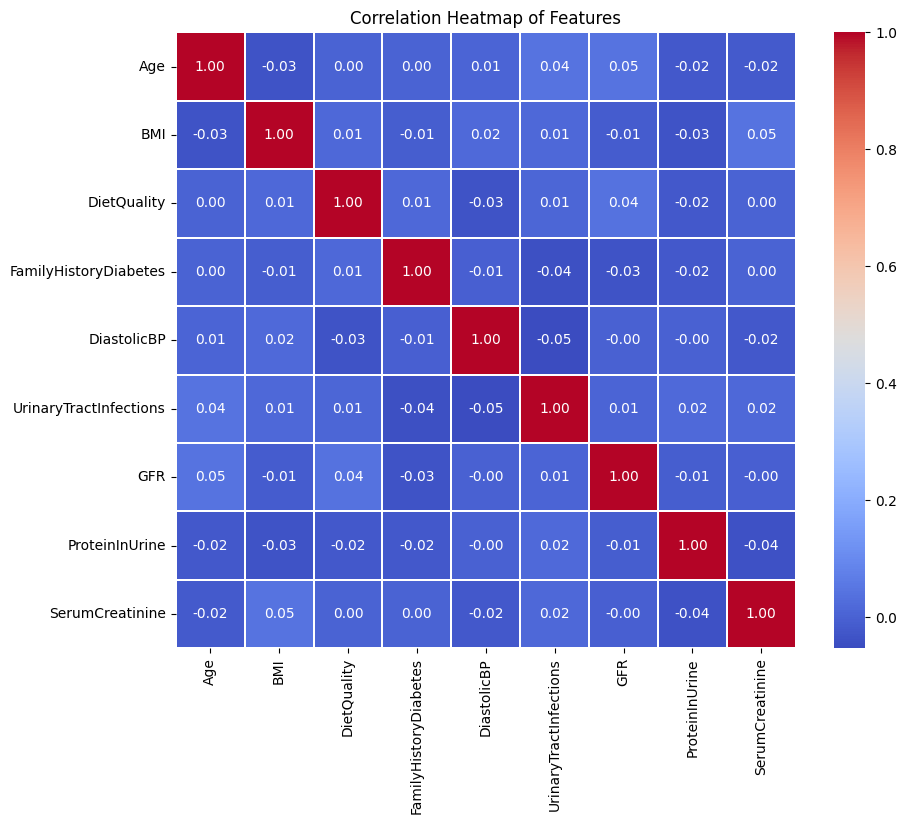

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.3)
plt.title("Correlation Heatmap of Features")
plt.show()

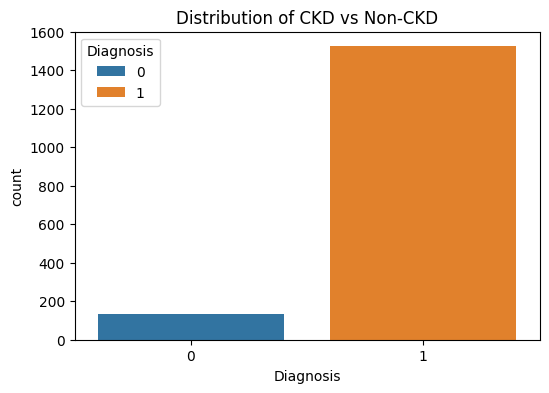

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Diagnosis"],hue=df['Diagnosis'])
plt.title("Distribution of CKD vs Non-CKD")
plt.show()

In [81]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
1,1524
0,135


In [82]:
X = df.drop(['Diagnosis', 'DoctorInCharge'], axis=1)
y = df['Diagnosis']

In [83]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,random_state=42,test_size=0.2,stratify=y_res)

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
lg = LogisticRegression()

In [88]:
rfe = RFE(estimator=lg,n_features_to_select=10)

In [89]:
rfe = rfe.fit(X_train_scaled,y_train)

In [90]:
selected_features = X.columns[rfe.support_]

In [91]:
print(selected_features)

Index(['PatientID', 'Smoking', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'UrinaryTractInfections',
       'SerumCreatinine', 'GFR', 'ProteinInUrine', 'Edema', 'MuscleCramps'],
      dtype='object')


# Random Forest with balanced class weights

In [92]:
model = RandomForestClassifier(random_state=42,class_weight='balanced')

In [93]:
model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [94]:
y_pred = model.predict(X_test_scaled)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       305
           1       0.99      0.96      0.97       305

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610



In [96]:
print(roc_auc_score(y_test, y_pred))

0.9754098360655739


In [97]:
cm = confusion_matrix(y_test, y_pred)

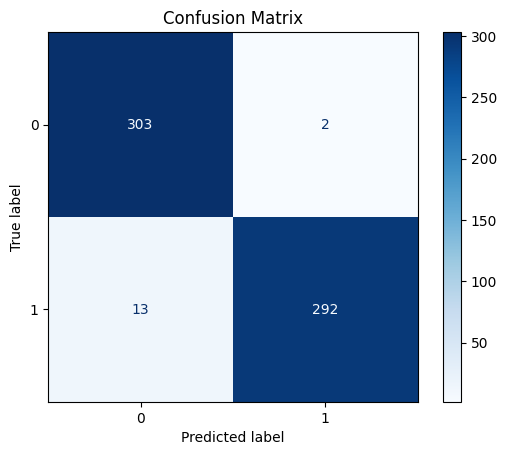

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()